In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datapath = '/content/drive/MyDrive/Colab Notebooks/태양열 발전량 예측'
trainpath = datapath + '/train/train.csv'

train_org = pd.read_csv(trainpath, index_col=0)

## 칼럼 설명

1. Hour - 시간

2. Minute - 분

3. DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))

4. DNI - 직달일사량(Direct Normal Irradiance (W/m2))

5. WS - 풍속(Wind Speed (m/s))

6. RH - 상대습도(Relative Humidity (%))

7. T - 기온(Temperature (Degree C))

8. Target - 태양광 발전량 (kW)


## Timestamp 찍기 위해 변환

In [ ]:
train = train_org.reset_index()
def toTime(hour, min):
    return str(int(hour)) + '-' + str(int(min))

train['Time'] = train.apply(lambda x: toTime(x['Hour'], x['Minute']), axis=1)
train.drop(['Hour', 'Minute'], axis=1, inplace=True)
train

,Day,DHI,DNI,WS,RH,T,TARGET,Time
0,0,0,0,1.5,69.08,-12,0.0,0-0
1,0,0,0,1.5,69.06,-12,0.0,0-30
2,0,0,0,1.6,71.78,-12,0.0,1-0
3,0,0,0,1.6,71.75,-12,0.0,1-30
4,0,0,0,1.6,75.20,-12,0.0,2-0
...,...,...,...,...,...,...,...,...
52555,1094,0,0,2.4,70.70,-4,0.0,21-30
52556,1094,0,0,2.4,66.79,-4,0.0,22-0
52557,1094,0,0,2.2,66.78,-4,0.0,22-30
52558,1094,0,0,2.1,67.72,-4,0.0,23-0


In [ ]:
# null check
train.isna().sum()

Day       0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
Time      0
dtype: int64

In [ ]:
temp = train.groupby('Time').mean()
temp = temp.sort_values(by='TARGET', ascending=True)
temp

,Day,DHI,DNI,WS,RH,T,TARGET
Time,,,,,,,
0-0,547.0,0.000000,0.000000,2.160548,71.108913,5.017352,0.000000
4-30,547.0,0.000000,0.000000,2.142374,71.953680,3.946119,0.000000
4-0,547.0,0.000000,0.000000,2.126027,72.404849,3.870320,0.000000
3-30,547.0,0.000000,0.000000,2.117534,72.877142,3.921461,0.000000
3-0,547.0,0.000000,0.000000,2.161735,72.228429,4.120548,0.000000
23-30,547.0,0.000000,0.000000,2.108037,71.880548,5.075799,0.000000
23-0,547.0,0.000000,0.000000,2.105845,70.664667,5.389954,0.000000
22-30,547.0,0.000000,0.000000,2.053881,71.443306,5.495890,0.000000
22-0,547.0,0.000000,0.000000,2.057352,70.008283,5.842009,0.000000


위의 표를 보면 오후 7시 30분부터 4시 30분까지는 어떤 계절에서든 발전량이 아예 없는 것으로 확인할 수 있다.

## 계절성 확인

In [ ]:
# 월별 평균 데이터로 확인해보도록 한다.
temperature = train.groupby('Day').mean()
temperature

,DHI,DNI,WS,RH,T,TARGET
Day,,,,,,
0,44.937500,78.708333,1.929167,70.329375,-7.979167,6.520751
1,18.604167,295.187500,1.718750,74.231250,-6.312500,11.025184
2,28.937500,24.645833,2.470833,76.275000,-6.479167,3.165478
3,39.312500,66.979167,2.279167,65.695208,-5.687500,5.810807
4,44.125000,22.500000,3.995833,73.361042,0.854167,4.817273
...,...,...,...,...,...,...
1090,18.729167,306.437500,2.810417,57.857500,-0.895833,11.261230
1091,29.833333,206.583333,1.970833,55.269792,0.854167,9.349126
1092,34.562500,171.291667,3.368750,49.227292,2.187500,8.875729


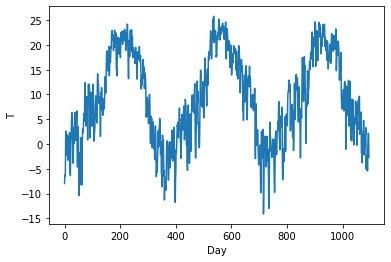

In [ ]:
# 온도의 주기 확인 그래프 -> Temeperature로 계절을 확인할 수 있음
sns.lineplot(x=temperature.index, y=temperature['T'])

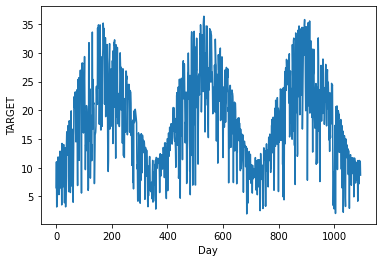

In [ ]:
# 계절별로 태양광 발전의 추이 그래프 확인
sns.lineplot(x=temperature.index, y=temperature['TARGET'])

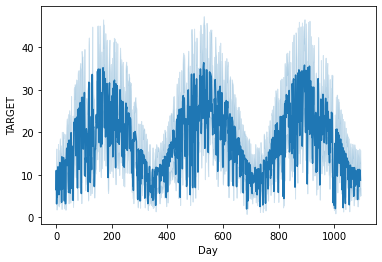

In [ ]:
sns.lineplot(x=train['Day'], y=train['TARGET'])

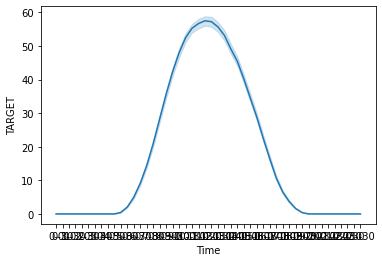

In [ ]:
sns.lineplot(x=train['Time'], y=train['TARGET'])

추세는 없는 것으로 확인됨. 계절성은 존재하며 년 단위의 주기가 보임.

 테스트 셋에서 가지고 있는 데이터가 어느 계절에 해당하는지를 판단하는 알고리즘을 구성하는 것이 좋은 예측을 하는데 필요함. -> 우리의 테스트 셋은 7일의 무작위 달의 데이터를 입력으로 받기 때문에 내부 정보를 통해서만 판단해야함.


 나의 제안:
 평균 기온을 가지는 테이블을 하나 만든 다음에 해당 테이블을 참조하여 입력 데이터의 평균 기온과 가장 유사한 달 혹은 계절로 판단. 달로 가는게 조금 더 세부적이라 괜찮을거 같음. 그러나 매월 평균 기온 테이블이 월별 차이가 유의미하지 않다면 기준 기간을 늘려야 할 것임.(ex. 월 -> 계절, 계절 -> 연도)


  즉, 우리는 최종적으로 앞에서 만든 평균 기온 테이블의 레이블의 갯수만큼의 모델을 만들어야 할 수 있음.

  궁금한 점: stationary한 데이터의 계절성과 주기가 명확하다면 자기상관성은 존재하지 않는 것인가?

## DHI와 DNI와 발전량과의 관계 확인

In [ ]:
# 발전량이 존재하는 날들의 발전량과의 상관관계 테이블
sunny = train[train['TARGET'] > 0]
sunny.corr()

,Day,DHI,DNI,WS,RH,T,TARGET
Day,1.000000,-0.041242,0.054576,0.075307,-0.169724,0.089614,0.007215
DHI,-0.041242,1.000000,-0.245374,0.062099,-0.228726,0.293557,0.408332
DNI,0.054576,-0.245374,1.000000,0.070019,-0.469546,0.149803,0.682004
WS,0.075307,0.062099,0.070019,1.000000,-0.050522,-0.134328,0.097465
RH,-0.169724,-0.228726,-0.469546,-0.050522,1.000000,-0.595369,-0.606587
T,0.089614,0.293557,0.149803,-0.134328,-0.595369,1.000000,0.462893
TARGET,0.007215,0.408332,0.682004,0.097465,-0.606587,0.462893,1.000000


In [ ]:
# 발전량이 없는 시간도 포함한 상관관계 표
train.corr()

,Day,DHI,DNI,WS,RH,T,TARGET
Day,1.000000,-0.027802,0.021901,0.038477,-0.127688,0.072897,-0.002505
DHI,-0.027802,1.000000,0.288294,0.203286,-0.478503,0.457813,0.666908
DNI,0.021901,0.288294,1.000000,0.219555,-0.611184,0.402460,0.833547
WS,0.038477,0.203286,0.219555,1.000000,-0.230035,0.027693,0.238521
RH,-0.127688,-0.478503,-0.611184,-0.230035,1.000000,-0.532777,-0.677178
T,0.072897,0.457813,0.402460,0.027693,-0.532777,1.000000,0.561990
TARGET,-0.002505,0.666908,0.833547,0.238521,-0.677178,0.561990,1.000000


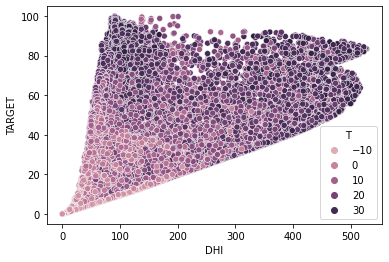

In [ ]:
sns.scatterplot(x=train['DHI'], y=train['TARGET'], hue=train['T'])

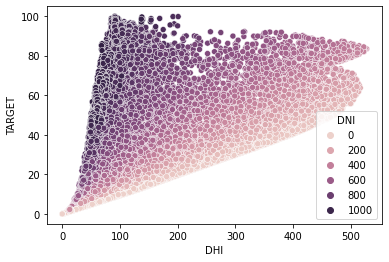

In [ ]:
sns.scatterplot(x=train['DHI'], y=train['TARGET'], hue=train['DNI'])
# 그래프 되게 이쁘게 나온다

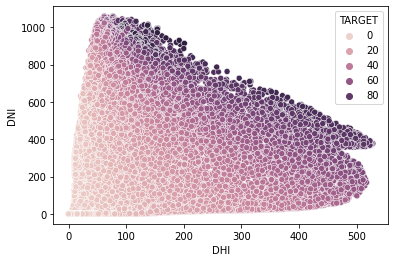

In [ ]:
sns.scatterplot(x=train['DHI'], y=train['DNI'], hue=train['TARGET'])
# 그래프 되게 이쁘게 나온다2

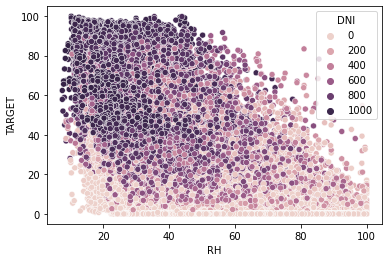

In [ ]:
sns.scatterplot(x=train['RH'], y=train['TARGET'], hue=train['DNI'])

관련은 있어보이나 큰 관련성은 없다고 판단되어짐.

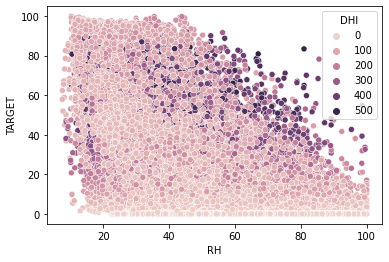

In [ ]:
sns.scatterplot(x=train['RH'], y=train['TARGET'], hue=train['DHI'])

상당히 중요한 결과를 볼 수 있는데 무작정 DNI와 DHI가 높다고 높은 발전량을 가지는 것이 아니고 일정한 조합 속에서 높은 발전량을 기록한다. DNI가 낮더라도 DHI가 크다면 발전량이 크고 DHI가 낮아도 DNI가 크면 발전량이 크다.

Text(0.5, 1.0, 'Scatter plot for DHI and Target (hue: Temperature)')

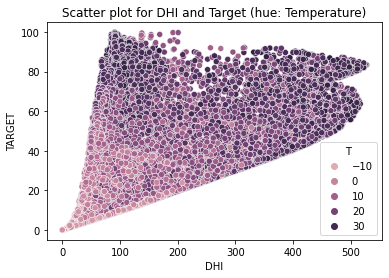

In [ ]:
sns.scatterplot(x=train['DHI'], y=train['TARGET'], hue=train['T']).set_title("Scatter plot for DHI and Target (hue: Temperature)")

DHI와 기온 역시 어느 정도의 관계를 가지며 발전량과 연관 있어보임

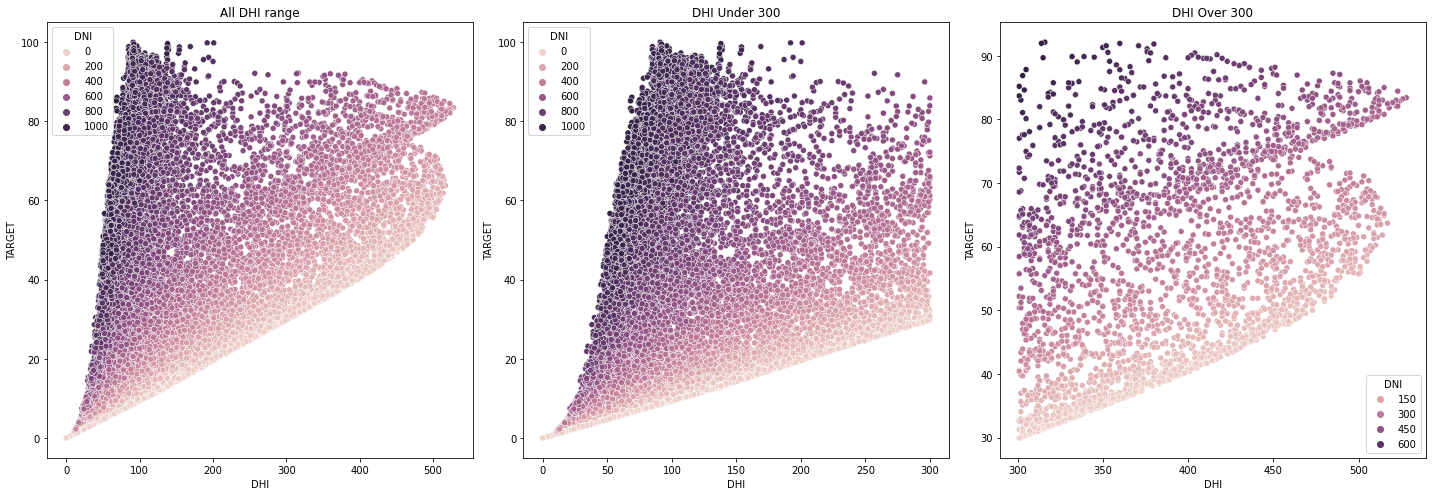

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 7))

dhi_candidates = train[train['DHI'] > 300]
sns.scatterplot(x=train['DHI'], y=train['TARGET'], hue=train['DNI'], ax=axs[0]).set_title("All DHI range")

temp = train[train['DHI'] <= 300]
sns.scatterplot(x=temp['DHI'], y=temp['TARGET'], hue=temp['DNI'], ax=axs[1]).set_title("DHI Under 300")

sns.scatterplot(x=dhi_candidates['DHI'], y=dhi_candidates['TARGET'], hue=dhi_candidates['DNI'], ax=axs[2]).set_title("DHI Over 300")

plt.tight_layout()

Text(0.5, 1.0, 'Line plot of Time and Target with dataset having zero-DHI')

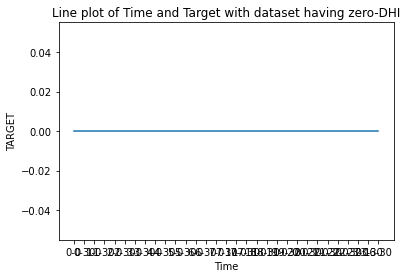

In [ ]:
zero_dhi = train[train['DHI'] == 0]
sns.lineplot(x=zero_dhi['Time'], y=zero_dhi['TARGET']).set_title("Line plot of Time and Target with dataset having zero-DHI")

Text(0.5, 1.0, 'Line plot of Time and Target  with dataset having zero-DNI')

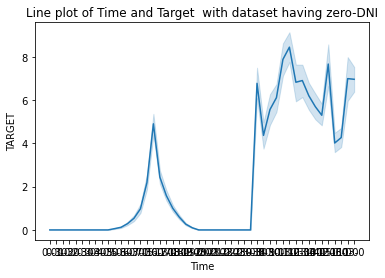

In [ ]:
zero_dni = train[train['DNI'] == 0]
sns.lineplot(x=zero_dni['Time'], y=zero_dni['TARGET']).set_title("Line plot of Time and Target  with dataset having zero-DNI")

In [ ]:
zero_dni['TARGET'].value_counts()

0.000000    26660
1.501566        9
1.689020        9
1.783110        8
1.970805        7
            ...  
6.567907        1
1.782698        1
1.689058        1
3.002604        1
4.129443        1
Name: TARGET, Length: 2072, dtype: int64

In [ ]:
temp = zero_dni[zero_dni['TARGET'] > 0]
temp

,Day,DHI,DNI,WS,RH,T,TARGET,Time
30,0,62,0,2.5,68.55,-5,5.818888,15-0
33,0,10,0,2.0,70.28,-6,0.938541,16-30
67,1,23,0,3.0,56.92,-2,2.158549,9-30
112,2,8,0,2.2,72.05,-3,0.750808,8-0
113,2,18,0,2.0,66.85,-2,1.689299,8-30
...,...,...,...,...,...,...,...,...
52095,1085,16,0,2.1,42.43,-5,1.501649,7-30
52209,1087,13,0,1.0,46.45,-3,1.220063,16-30
52257,1088,16,0,1.0,79.80,-2,1.501599,16-30
52401,1091,16,0,1.5,71.20,0,1.501566,16-30


Text(0.5, 1.0, 'Scatter plot for Time and DHI with dataset zero-DNI')

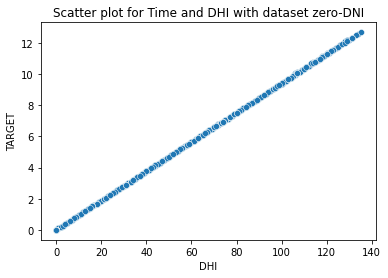

In [ ]:
sns.scatterplot(x=zero_dni['DHI'], y=zero_dni['TARGET']).set_title('Scatter plot for Time and DHI with dataset zero-DNI')

### 정리

논문 검색 결과 DHI와 DNI는 서로 결합하여 나타내는 방법이 있음. 그 공식을 그대로 적용하는 것 보다 피처를 통합하는 좋은 방법으로 변환을 시도해봄직함.

 앞선 그래프 상 DHI와 DNI의 적절한 조합이 발전량과 크게 연관되어 있음. 새로운 피처를 생성하여 해당 피처와 타겟과의 관련도를 살펴 보는 것을 제안함.

  DHI가 0이면 발전량이 0이 되지만 DNI가 0인 경우에는 DHI가 0이 아니라면 발전량은 존재함. DNI가 0인 경우에 발전량은 DHI와 완벽한 선형적인 관계를 가짐.

## 아웃라이어 확인 및 제거 (를 할 필요가 있나?)

앞서 확인하였듯이 DHI가 0이면 발전량도 0이기 때문에 발전량이 존재하는 날의 부분 데이터 프레임을 sunny라고 명명한 뒤에 해당 

In [ ]:
train.describe()

,Day,DHI,DNI,WS,RH,T,TARGET
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,547.000000,64.344121,234.792371,2.456033,56.793102,9.279928,17.790630
std,316.102148,103.897125,349.684583,1.426874,22.052875,10.179741,25.759955
min,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000
25%,273.000000,0.000000,0.000000,1.400000,39.697500,1.000000,0.000000
50%,547.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000
75%,821.000000,87.000000,469.000000,3.200000,72.770000,17.000000,32.089890
max,1094.000000,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939


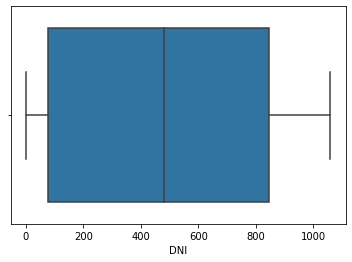

In [ ]:
sns.boxplot(data=sunny, x='DNI')

In [ ]:
dhi_candidates = train[train['DHI'] > 300]
dhi_candidates

,Day,DHI,DNI,WS,RH,T,TARGET,Time
2426,50,307,254,2.8,69.60,5,43.730708,13-0
2519,52,318,206,3.4,60.21,-8,42.047546,11-30
2520,52,307,327,3.5,61.32,-8,48.617475,12-0
2521,52,317,274,3.4,61.30,-8,46.364927,12-30
2522,52,316,128,3.4,62.03,-8,37.260883,13-0
...,...,...,...,...,...,...,...,...
48650,1013,320,140,0.5,17.56,20,38.563000,13-0
48886,1018,318,221,4.4,9.26,21,43.160061,11-0
48887,1018,326,121,4.4,9.26,21,38.093445,11-30
48888,1018,326,121,4.4,8.69,21,38.093445,12-0


## DHI와 DNI의 값 통합 방법

Global Horizontal (GHI) = Direct Normal (DNI) X cos(θ) + Diffuse Horizontal (DHI)

    DNI: 직달 일사
    DHI: 산란 일사

 외부 데이터 사용이 금지되어 있으므로 GHI를 외부에서 가져오는 것을 불가능함. 따라서 우리가 가지고 있는 데이터로 알맞은 cos 값을 찾아내는 방법을 제안함. 

  DHI는 기본적으로 발전량과 매우 선형적인 관계를 지니고 있으며 DNI에 따라 발전량이 조금씩 달라짐

  첫번째 의문점) 정말 GHI를 구하는 것이 좋은 결과를 내는가?

  두번째 의문점) cos 값을 우리가 구해야 하는 것인가?


## 해당 데이터의 발전량으로 계절을 예측하는 방법



1.   만약 두 피쳐의 값을 통합하여 계산한다면 저ㅏㄹ 모르겠다 아

2.   LSTM을 사용하는 것이 맞는가?

3. LGBM으로도 예측이 가능한 것일까?

